### **Step 1: Import Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### **Step 2: Load the Dataset**

In [5]:
# Load the dataset
df = pd.read_csv('./datasets/Melbourne_housing_FULL.csv')

# Display the first few rows of the dataframe
df.head(10)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0
5,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0
6,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0
7,Abbotsford,16 Maugie St,4,h,NaN,SN,Nelson,6/08/2016,2.5,3067.0,...,2.0,2.0,400.0,220.0,2006.0,Yarra City Council,-37.7965,144.9965,Northern Metropolitan,4019.0
8,Abbotsford,53 Turner St,2,h,NaN,S,Biggin,6/08/2016,2.5,3067.0,...,1.0,2.0,201.0,NaN,1900.0,Yarra City Council,-37.7995,144.9974,Northern Metropolitan,4019.0
9,Abbotsford,99 Turner St,2,h,NaN,S,Collins,6/08/2016,2.5,3067.0,...,2.0,1.0,202.0,NaN,1900.0,Yarra City Council,-37.7996,144.9989,Northern Metropolitan,4019.0


### **Step 3: Data Cleaning**

In [6]:
# Check for missing values
df.isnull().sum()

# Drop rows with missing values in essential columns (e.g., Price, Date)
df.dropna(subset=['Price', 'Date', 'Rooms', 'Type', 'Landsize', 'CouncilArea'], inplace=True)

# Fill or drop remaining missing values as needed
df['Landsize'].fillna(df['Landsize'].median(), inplace=True)
df['BuildingArea'].fillna(df['BuildingArea'].median(), inplace=True)

### **Step 4: Convert Data Types**

In [7]:
# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df = df.dropna(subset=['Date'])

### **Step 5: Trends in Housing Prices Over Time**

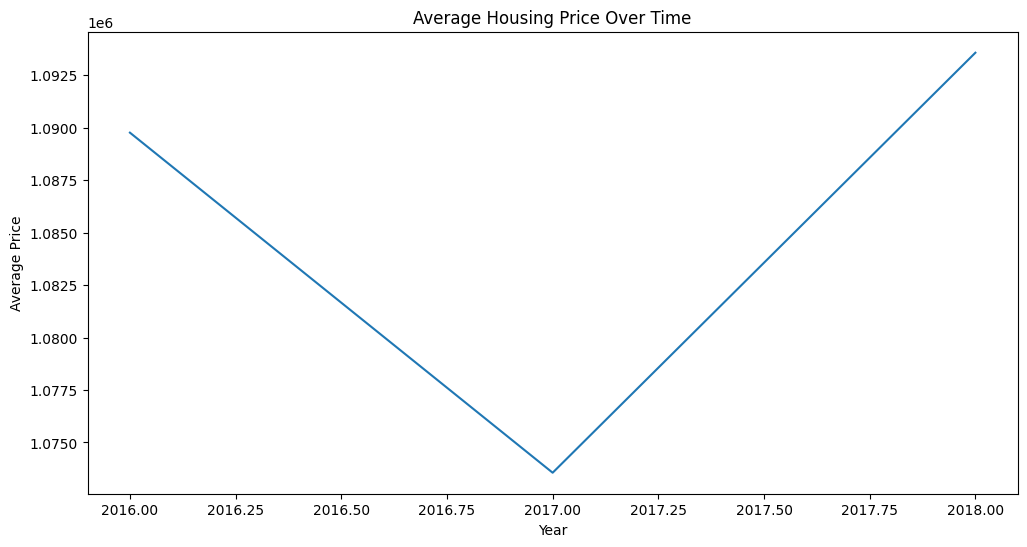

In [23]:
# Extract year and month from Date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

# Average price by year
price_by_year = df.groupby('Year')['Price'].mean().reset_index()

# Plot the data
plt.figure(figsize=(12, 6))
sns.lineplot(data=price_by_year, x='Year', y='Price')
plt.title('Average Housing Price Over Time')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.show()

### **Step 6: Impact of Location on Prices**


C:\Users\Azam\AppData\Local\Temp\ipykernel_2700\1281047625.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=price_by_council, y='Price', x='CouncilArea', palette='viridis')


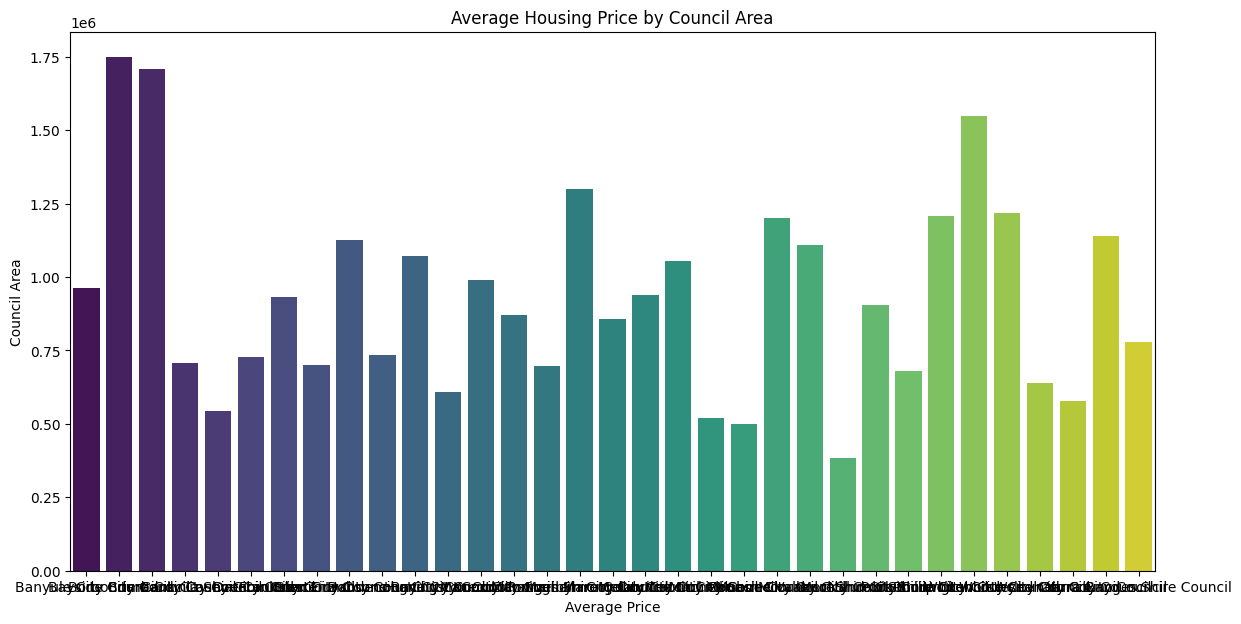

In [31]:
# Average price by council area
price_by_council = df.groupby('CouncilArea')['Price'].mean().reset_index()

# Plot the data
plt.figure(figsize=(14, 7))
sns.barplot(data=price_by_council, y='Price', x='CouncilArea', palette='viridis')
plt.title('Average Housing Price by Council Area')
plt.xlabel('Average Price')
plt.ylabel('Council Area')
plt.show()

### **Step 7: Relationship Between Property Attributes and Price**
## Number of Rooms vs. Price

C:\Users\Azam\AppData\Local\Temp\ipykernel_2700\675338705.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Rooms', y='Price', palette='viridis')


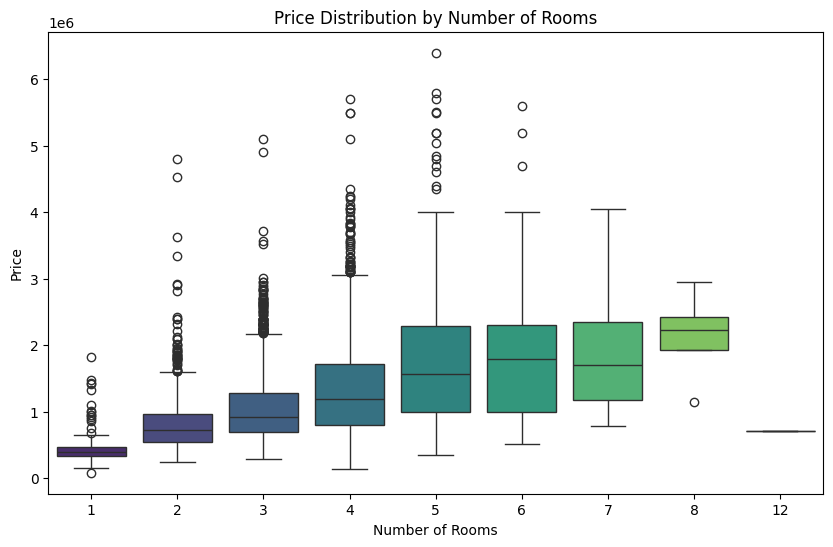

In [32]:
# Plot price vs. number of rooms
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Rooms', y='Price', palette='viridis')
plt.title('Price Distribution by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Price')
plt.show()

### **Type of Property vs. Price**

C:\Users\Azam\AppData\Local\Temp\ipykernel_16104\1788530113.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Type', y='Price', palette='viridis')


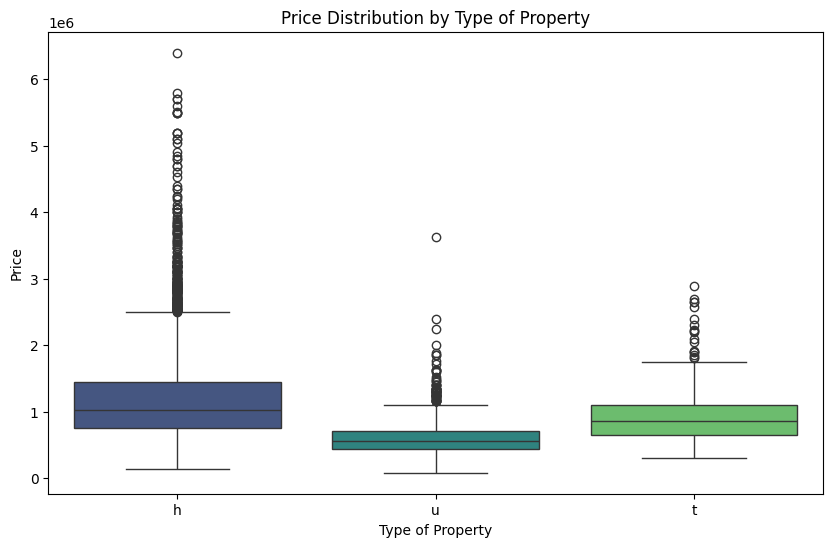

In [11]:
# Plot price vs. type of property
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='Type', y='Price', palette='viridis')
plt.title('Price Distribution by Type of Property')
plt.xlabel('Type of Property')
plt.ylabel('Price')
plt.show()

### **Land Size vs. Price**

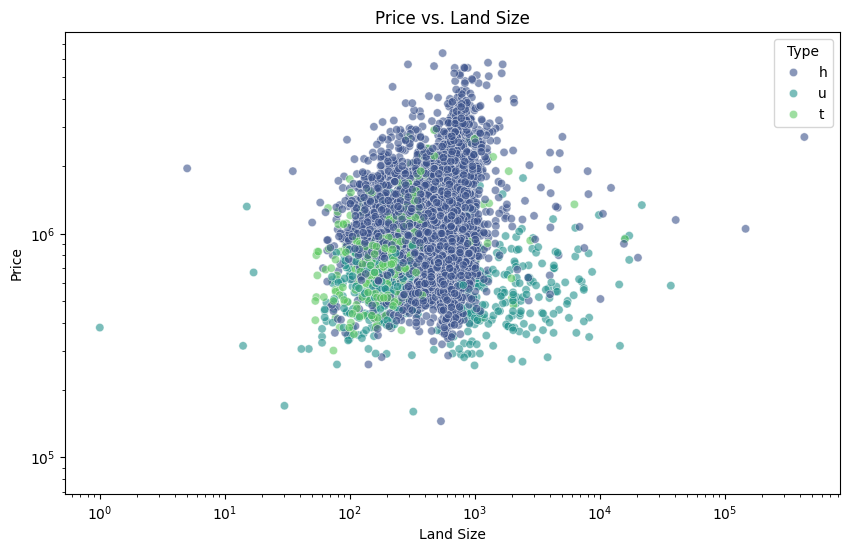

In [36]:
# Plot price vs. land size
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Landsize', y='Price', hue='Type', alpha=0.6, palette='viridis')
plt.title('Price vs. Land Size')
plt.xlabel('Land Size')
plt.ylabel('Price')
plt.xscale('log')
plt.yscale('log')
plt.show()